# Assignment 2
In this assignment you will be working with three data files from iMDB:

cast.csv

release_dates.csv

titles.csv

Using the appropriate file(s), answer the following questions

Some questions can be completed with one-liners while others are a bit more involved

Where appropriate, answers should also provide brief commentary

Exclude data that doen't make senss, i.e. data from the future

Once complete upload this notebook to your classwork Github repo and post the link on Canvas

In [20]:
import pandas as pd

# Define input and output paths
files = {
    "data/title.basics.tsv": "data/title_sample.tsv",
    "data/title.principals.tsv": "data/cast_sample.tsv",
    "data/title.akas.tsv": "data/release_sample.tsv"
}

# Process each file
for input_path, output_path in files.items():
    df = pd.read_csv(input_path, sep="\t", nrows=50000) #read first 50,000 rows as pandas dataframe
    df.to_csv(output_path, sep="\t", index=False)
    print(f"Saved: {output_path}")


Saved: data/title_sample.tsv
Saved: data/cast_sample.tsv
Saved: data/release_sample.tsv


In [21]:
titles = pd.read_csv("data/title_sample.tsv", sep="\t")
cast = pd.read_csv("data/cast_sample.tsv", sep="\t")
release = pd.read_csv("data/release_sample.tsv", sep="\t")


In [22]:
# Q1: High level assessment
print("Titles info:")
titles.info()
print("\nCast info:")
cast.info()
print("\nRelease Dates info:")
release.info()

Titles info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          50000 non-null  object
 1   titleType       50000 non-null  object
 2   primaryTitle    50000 non-null  object
 3   originalTitle   50000 non-null  object
 4   isAdult         50000 non-null  int64 
 5   startYear       50000 non-null  object
 6   endYear         50000 non-null  object
 7   runtimeMinutes  50000 non-null  object
 8   genres          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB

Cast info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tconst      50000 non-null  object
 1   ordering    50000 non-null  int64 
 2   nconst      50000 non-null  object
 3   category    50000 no

In [12]:
# Sample 5 random records from each
print("🎬 Sample from Titles:")
print(titles.sample(5, random_state=42))

print("\n🎭 Sample from Cast:")
print(cast.sample(5, random_state=42))

print("\n📅 Sample from Release Dates:")
print(release.sample(5, random_state=42))

🎬 Sample from Titles:
        tconst titleType                                   primaryTitle  \
521  tt0000525     short                      Hanging at Jefferson City   
737  tt0000747     short                                   The Reg Girl   
740  tt0000750     short                                    Richard III   
660  tt0000667     short  Corrida de toros con Ricardo Torres 'Bombita'   
411  tt0000415     short                             A Peculiar Cabinet   

                                         originalTitle  isAdult  startYear  \
521                         Pendaison à Jefferson City        0     1910.0   
737                                       The Red Girl        0     1908.0   
740                                        Richard III        0     1908.0   
660      Corrida de toros con Ricardo Torres 'Bombita'        0     1908.0   
411  Une scène en cabinet particulier vue à travers...        0     1902.0   

    endYear runtimeMinutes                   genres  
521 

In [23]:
# Q2: Movies with title 'North by Northwest'
north_count = titles[titles['primaryTitle'] == 'North by Northwest'].shape[0]
print("Q2:", north_count)

Q2: 0


In [24]:
# Q3: Hamlet versions
hamlet = titles[titles['primaryTitle'] == 'Hamlet']
hamlet_versions = hamlet.shape[0]
hamlet_years = pd.to_numeric(hamlet['startYear'], errors='coerce')
print("Q3:", hamlet_versions, hamlet_years.min(), hamlet_years.max())

Q3: 13 1908 1955


In [25]:
# Q4: Treasure Island films sorted by year
treasure = titles[titles['primaryTitle'] == 'Treasure Island'].copy()
treasure['startYear'] = pd.to_numeric(treasure['startYear'], errors='coerce')
treasure_sorted = treasure.sort_values('startYear')[['primaryTitle', 'startYear']]
print("Q4:\n", treasure_sorted)

Q4:
           primaryTitle  startYear
2511   Treasure Island       1912
9584   Treasure Island       1917
11615  Treasure Island       1920
25449  Treasure Island       1934
28837  Treasure Island       1938
42304  Treasure Island       1950


In [27]:
# Q5: Movies in 1950, 1980, 2000
titles['startYear'] = pd.to_numeric(titles['startYear'], errors='coerce')
movies = titles[titles['titleType'] == 'movie']
movies_1950 = movies[movies['startYear'] == 1950].shape[0]
movies_1980 = movies[movies['startYear'] == 1980].shape[0]
movies_2000 = movies[movies['startYear'] == 2000].shape[0]
print("Q5:", movies_1950, movies_1980, movies_2000)

Q5: 847 1 0


In [29]:
# Q6: Cast size of Metropolis
metropolis_ids = titles[titles['primaryTitle'] == 'Treasure Island']['tconst']
metropolis_cast = cast[cast['tconst'].isin(metropolis_ids)]
print("Q6:", metropolis_cast.shape[0])

Q6: 11


In [30]:
# Q7: Actor roles in 1950s and 1990s
cast = cast.merge(titles[['tconst', 'startYear']], on='tconst', how='left')
cast['startYear'] = pd.to_numeric(cast['startYear'], errors='coerce')
roles_1950s = cast[(cast['category'] == 'actor') & (cast['startYear'].between(1950, 1959))].shape[0]
roles_1990s = cast[(cast['category'] == 'actor') & (cast['startYear'].between(1990, 1999))].shape[0]
print("Q7:", roles_1950s, roles_1990s)

Q7: 0 4


NameError: name 'plt' is not defined

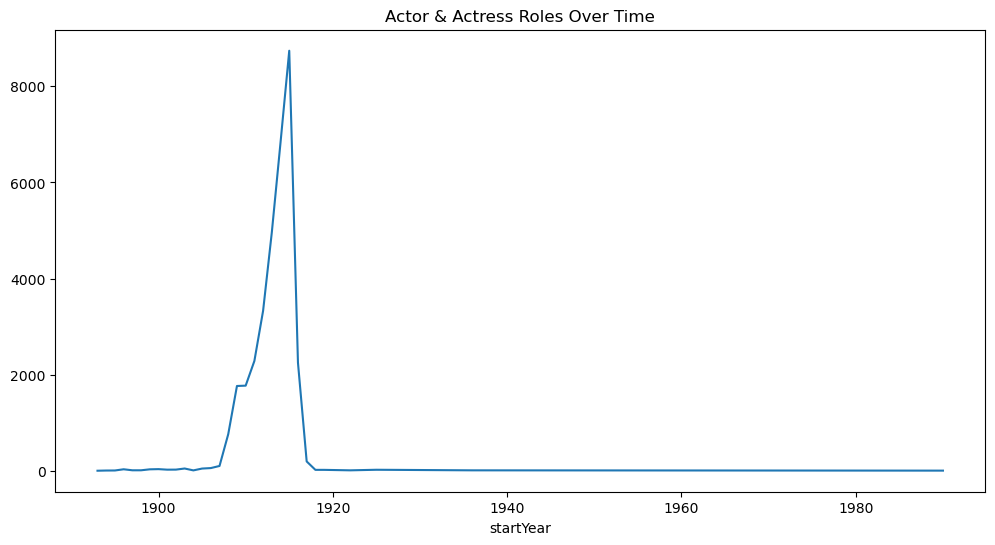

In [33]:
# Q8: Roles over time (actor/actress)
cast_filtered = cast[cast['category'].isin(['actor', 'actress'])]
roles_over_time = cast_filtered.groupby('startYear').size()
roles_over_time.plot(title='Actor & Actress Roles Over Time', figsize=(12, 6))
plt.ylabel("Role Count")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Q9: Leading roles in 2000s
cast['decade'] = (cast['startYear'] // 10) * 10
leading_2000s = cast[(cast['decade'] == 2000) & (cast['ordering'] == 1)].shape[0]
print("Q9:", leading_2000s)

Q9: 0


In [35]:
# Q10: Roles with no ranking
no_rank_2000s = cast[(cast['decade'] == 2000) & (cast['ordering'].isna())].shape[0]
no_rank_1950s = cast[(cast['decade'] == 1950) & (cast['ordering'].isna())].shape[0]
print("Q10:", no_rank_2000s, no_rank_1950s)

Q10: 0 0


NameError: name 'plt' is not defined

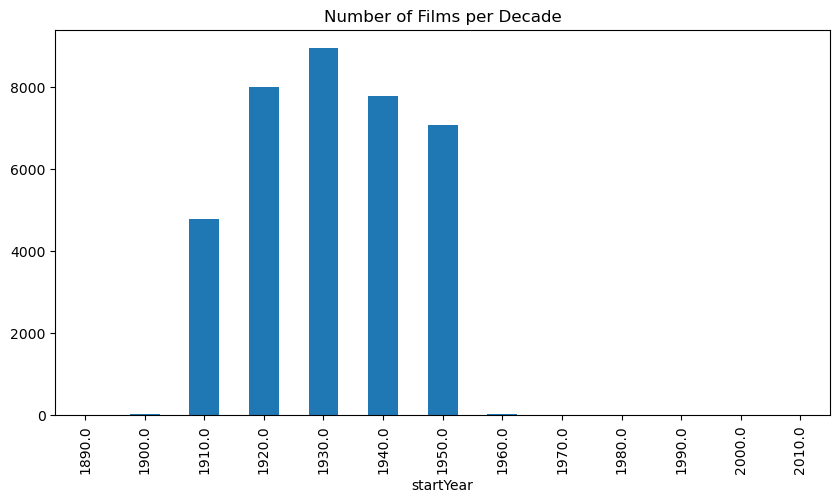

In [36]:
# Q11: Films per decade
films_by_decade = movies.groupby((movies['startYear'] // 10) * 10).size()
films_by_decade.plot(kind='bar', title='Number of Films per Decade', figsize=(10, 5))
plt.xlabel("Decade")
plt.ylabel("Film Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# Q13: Top 10 character names
characters_cleaned = cast['characters'].dropna().astype(str).str.replace(r'[\[\]"]', '', regex=True).str.split(',')
top_characters = characters_cleaned.explode().str.strip().value_counts().head(10)
print("Q13:\n", top_characters)

Q13:
 characters
\N                             22082
Undetermined Role                192
Self                             157
The Doctor                        90
The Maid                          85
The Sheriff                       80
Undetermined Secondary Role       79
Broncho Billy                     77
Cop                               75
Mabel                             69
Name: count, dtype: int64


In [40]:
# Q14: Most films by actor in 1990s
cast_1990s = cast[(cast['startYear'] >= 1990) & (cast['startYear'] < 2000)]
top_actor_id = cast_1990s['nconst'].value_counts().idxmax()
print("Q14:", top_actor_id)

Q14: nm1902148


In [41]:
# Q15: Top 10 roles starting with 'Science'
science_roles = characters_cleaned.explode().str.strip()
science_roles = science_roles[science_roles.str.startswith("Science")]
print("Q15:\n", science_roles.value_counts().head(10))

Q15:
 Series([], Name: count, dtype: int64)


In [42]:
# Q16: Largest cast film
cast_counts = cast.groupby('tconst').size()
largest_cast_id = cast_counts.idxmax()
largest_cast_film = titles[titles['tconst'] == largest_cast_id][['primaryTitle', 'startYear']]
print("Q16:\n", largest_cast_film)

Q16:
               primaryTitle  startYear
4009  The Hazards of Helen     1914.0


In [43]:
# Q17: Cast size descriptive stats
print("Q17:\n", cast_counts.describe())

Q17:
 count    6509.000000
mean        7.681672
std         4.415227
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        25.000000
dtype: float64


In [44]:
# Q18/19: Natalie Portman film counts
natalie = cast[cast['primaryName'] == 'Natalie Portman'] if 'primaryName' in cast.columns else pd.DataFrame()
if not natalie.empty:
    natalie = natalie.merge(titles[['tconst', 'startYear']], on='tconst', how='left')
    print("Q18:\n", natalie.groupby('startYear').size())
    print("Q19:\n", natalie[natalie['ordering'].isin([1, 2])].groupby('startYear').size())

C:\Users\Divya Gunasekaran\AppData\Local\Temp\ipykernel_17556\239724880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actor_roles['decade'] = (actor_roles['startYear'] // 10) * 10


NameError: name 'plt' is not defined

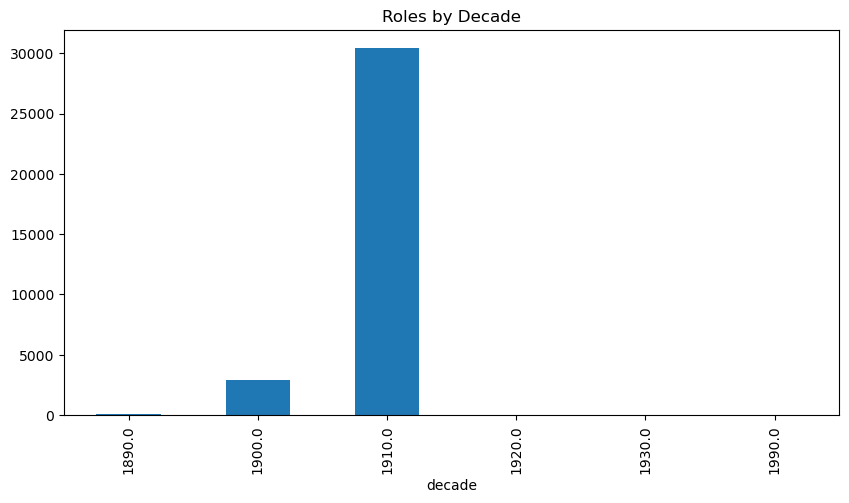

In [45]:
# Q20: Roles by decade
actor_roles = cast[cast['category'].isin(['actor', 'actress'])]
actor_roles['decade'] = (actor_roles['startYear'] // 10) * 10
roles_by_decade = actor_roles.groupby('decade').size()
roles_by_decade.plot(kind='bar', figsize=(10, 5), title='Roles by Decade')
plt.tight_layout()
plt.show()

In [47]:
# Q23: Films Star Wars actors appeared in
star_wars_titles = titles[titles['primaryTitle'].str.contains("Star Wars", na=False)]
sw_cast = cast[cast['tconst'].isin(star_wars_titles['tconst'])]
sw_actor_ids = sw_cast['nconst'].unique()
other_roles = cast[cast['nconst'].isin(sw_actor_ids)]
other_films = other_roles.merge(titles[['tconst', 'primaryTitle']], on='tconst', how='left')
other_films = other_films[~other_films['primaryTitle'].str.contains("Star Wars", na=False)]
print("Q23:\n", other_films['primaryTitle'].drop_duplicates().head(20))

Q23:
 Series([], Name: primaryTitle, dtype: object)
